In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [82]:
data = pd.read_csv(r'C:\Users\USER\OneDrive\Documents\GitHub\0105-data-prep-project-Tracy-teb\chip_dataset.csv')
data

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


### Explore the missingness in the dataset 

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [84]:
missing_data = data.isnull().mean()* 100
missing_data

#Multiply by 100 to get the percentage 

Unnamed: 0                0.000000
Product                   0.000000
Type                      0.000000
Release Date              0.000000
Process Size (nm)         0.185414
TDP (W)                  12.896580
Die Size (mm^2)          14.730119
Transistors (million)    14.647713
Freq (MHz)                0.000000
Foundry                   0.000000
Vendor                    0.000000
FP16 GFLOPS              88.957561
FP32 GFLOPS              59.868150
FP64 GFLOPS              73.094355
dtype: float64

In [85]:
#Missing Categorical variables
categories_vars = data.select_dtypes(include = ['object']).columns
categories_missing = data[categories_vars].isnull().sum()
categories_missing

Product         0
Type            0
Release Date    0
Foundry         0
Vendor          0
dtype: int64

In [86]:
# Numerical values
num_vars = data.select_dtypes(include=[np.number]).columns
num_missing = data[num_vars].isnull().sum()
num_missing

Unnamed: 0                  0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64

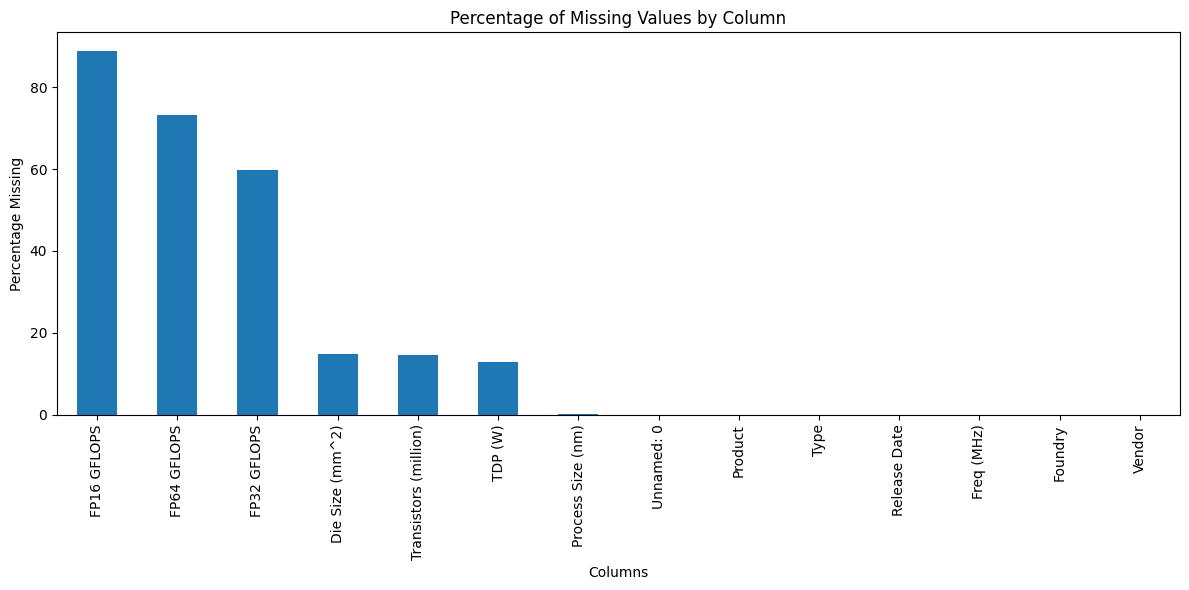

FP16 GFLOPS              88.957561
FP64 GFLOPS              73.094355
FP32 GFLOPS              59.868150
Die Size (mm^2)          14.730119
Transistors (million)    14.647713
TDP (W)                  12.896580
Process Size (nm)         0.185414
Unnamed: 0                0.000000
Product                   0.000000
Type                      0.000000
Release Date              0.000000
Freq (MHz)                0.000000
Foundry                   0.000000
Vendor                    0.000000
dtype: float64

In [87]:
# Calculate the percentage of missing values for each column
missing_percentages = (data.isnull().sum() / len(data)) * 100
missing_percentages = missing_percentages.sort_values(ascending=False)

# Plot the missingness
plt.figure(figsize=(12, 6))
missing_percentages.plot(kind ='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

missing_percentages

### Develop a strategy to deal with the missing values 
- For numerical columns with a small percentage of missing values <5% impute median
- For categorical columns, create a new category called "Unknown" for missing values
- For columns with > 50% missing values, consider dropping 

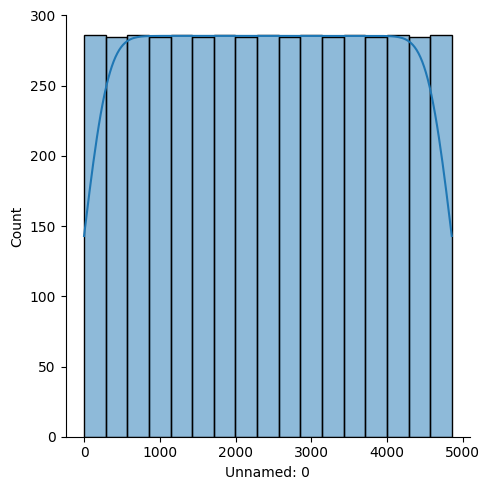

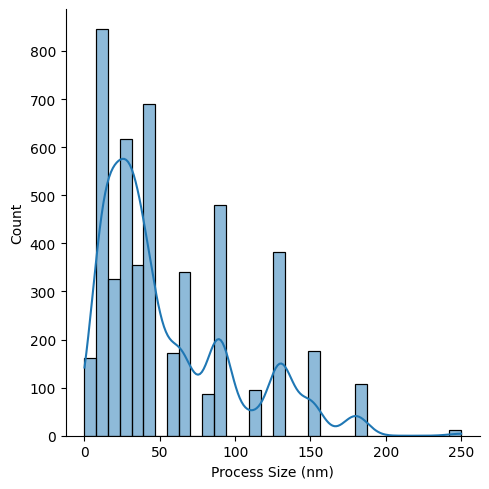

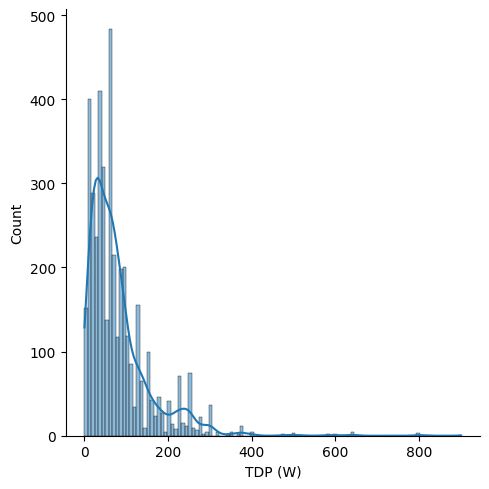

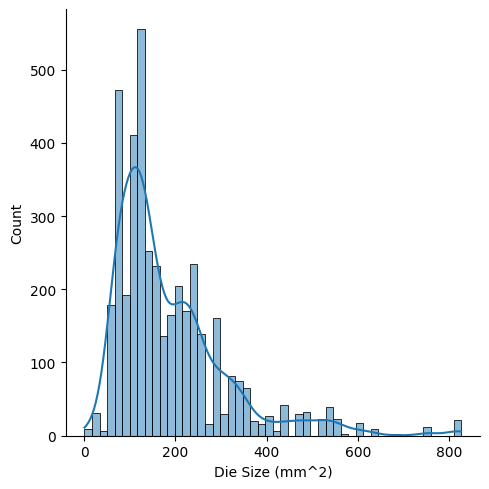

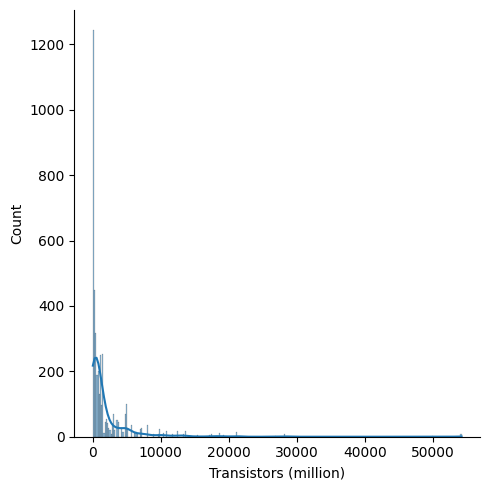

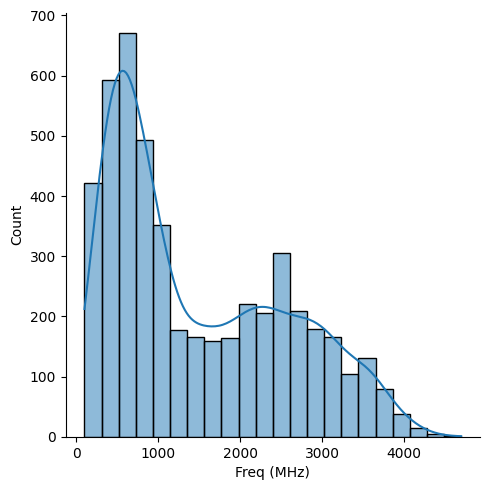

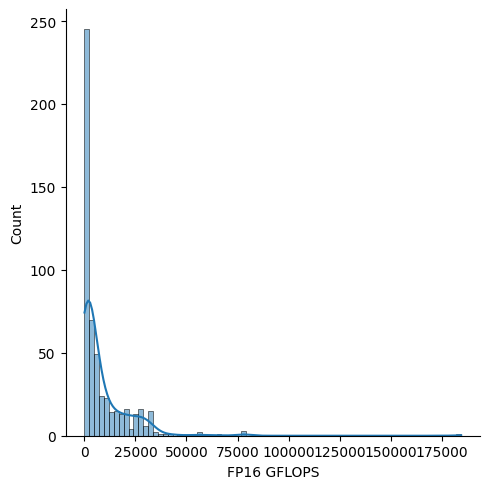

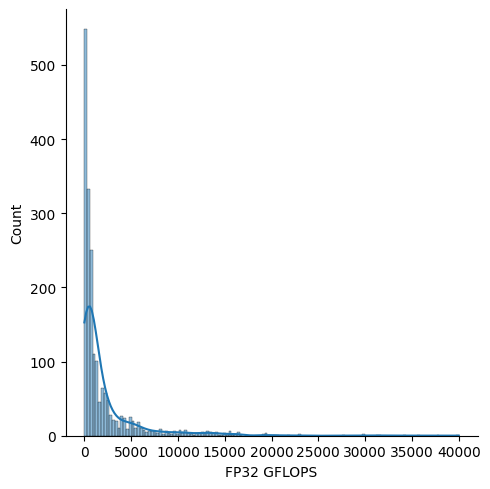

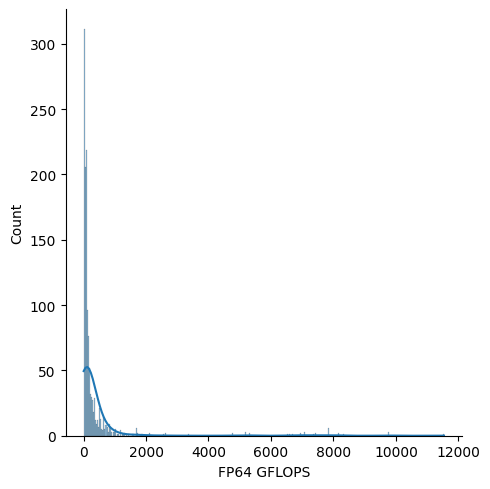

In [88]:
#plot data distribution for numerical variables
for i in data.select_dtypes (include = [np.number]).columns:
    sns.displot(data[i], kde=True)

In [89]:
# Impute numerical columns with median
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if data[col].isnull().sum() > 0 and data[col].isnull().sum() / len(data) < 0.05:
        data.loc[:, col] = data[col].fillna(data[col].median())


In [90]:
# Drop the 'Unnamed' column as it's not relevant for our analysis
data = data.drop(columns=['Unnamed: 0'])

In [91]:
data.columns.tolist()

['Product',
 'Type',
 'Release Date',
 'Process Size (nm)',
 'TDP (W)',
 'Die Size (mm^2)',
 'Transistors (million)',
 'Freq (MHz)',
 'Foundry',
 'Vendor',
 'FP16 GFLOPS',
 'FP32 GFLOPS',
 'FP64 GFLOPS']

### Transform temporal data ie date to datetime

In [92]:
# Convert 'date' to datetime
data['Release Date'] = pd.to_datetime(data['Release Date'])

### Perform a full EDA and demonstrate the validity of the assumptions 

In [93]:
data.describe()

,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4779,4854.000000,4228.000000,4139.000000,4143.000000,4854.000000,536.000000,1948.000000,1306.000000
mean,2011-03-26 17:07:29.717514240,55.081582,81.359981,188.440445,1929.922279,1484.406057,8397.459851,2134.756653,363.670511
min,2000-01-01 00:00:00,0.000000,1.000000,1.000000,8.000000,100.000000,10.020000,12.800000,3.600000
25%,2006-08-26 12:00:00,22.000000,33.000000,104.000000,154.000000,590.000000,768.800000,257.300000,38.295000
50%,2011-04-05 00:00:00,40.000000,65.000000,148.000000,624.000000,1073.500000,2965.500000,696.000000,89.280000
75%,2015-05-05 00:00:00,90.000000,100.000000,239.000000,1550.000000,2400.000000,10600.000000,2116.750000,220.000000
max,2021-04-13 00:00:00,250.000000,900.000000,826.000000,54200.000000,4700.000000,184600.000000,40000.000000,11540.000000
std,NaN,44.961631,76.807808,126.189383,4044.891098,1066.701523,13799.551131,3898.431487,1145.931856


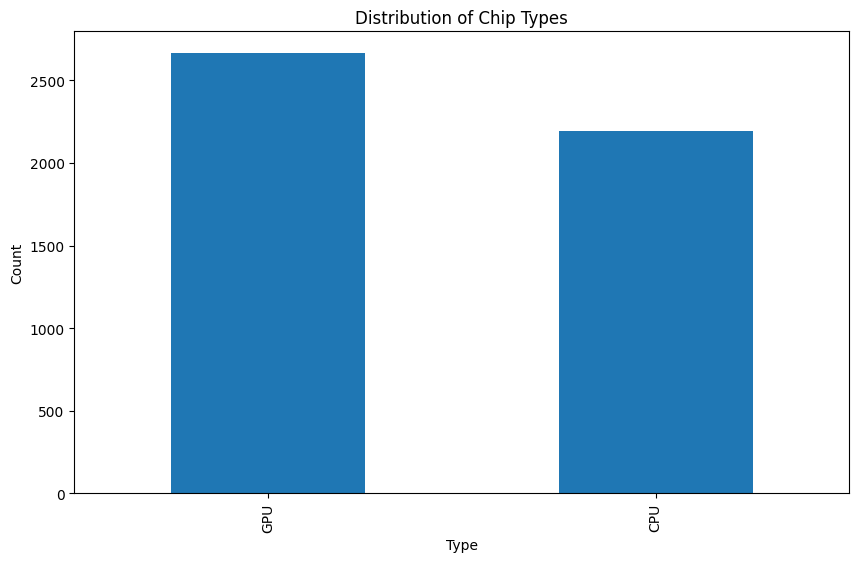

In [94]:
# Distribution of chip types
plt.figure(figsize=(10, 6))
data['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Chip Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()



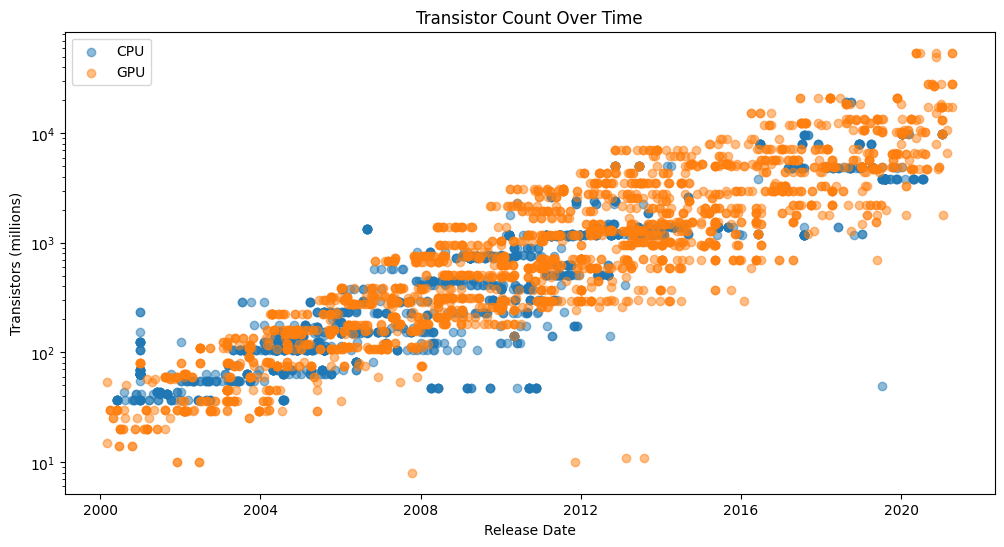

In [95]:
# Trend of transistor count over time
plt.figure(figsize=(12, 6))
for chip_type in data['Type'].unique():
    chip_data = data[data['Type'] == chip_type]
    plt.scatter(chip_data['Release Date'], chip_data['Transistors (million)'], label=chip_type, alpha=0.5)
plt.title("Transistor Count Over Time")
plt.xlabel("Release Date")
plt.ylabel("Transistors (millions)")
plt.yscale('log')
plt.legend()
plt.show()

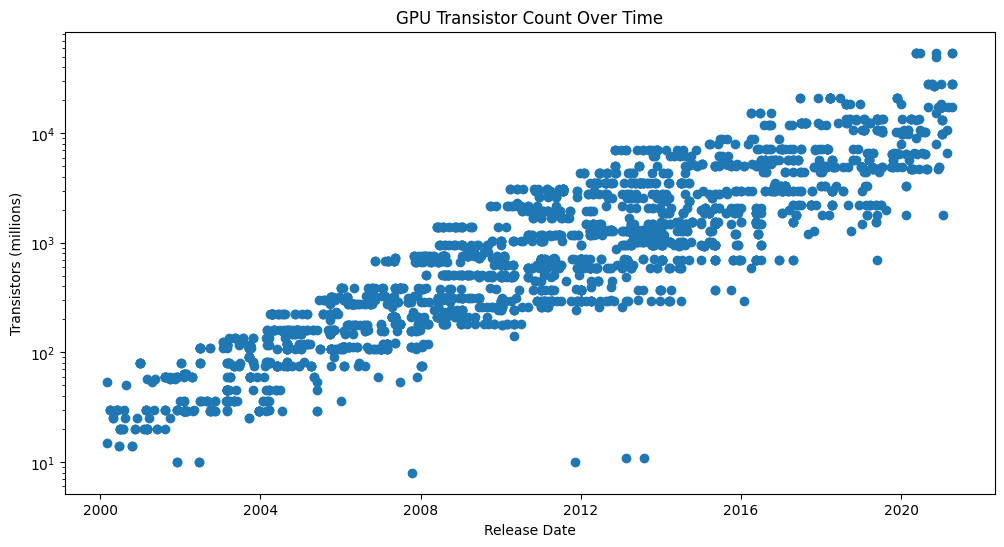

In [96]:
# Moore's Law: Transistor count doubling every ~2 years
gpu_data = data[data['Type'] == 'GPU'].sort_values('Release Date')
plt.figure(figsize=(12, 6))
plt.scatter(gpu_data['Release Date'], gpu_data['Transistors (million)'])
plt.title("GPU Transistor Count Over Time")
plt.xlabel("Release Date")
plt.ylabel("Transistors (millions)")
plt.yscale('log')
plt.show()


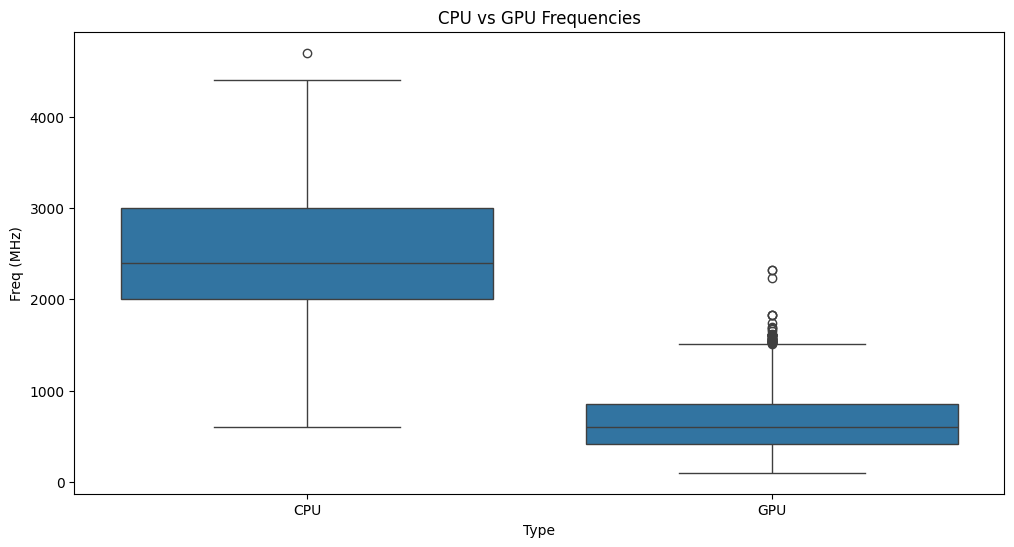

In [97]:
# CPU frequencies vs GPU frequencies
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Freq (MHz)', data=data)
plt.title("CPU vs GPU Frequencies")
plt.show()

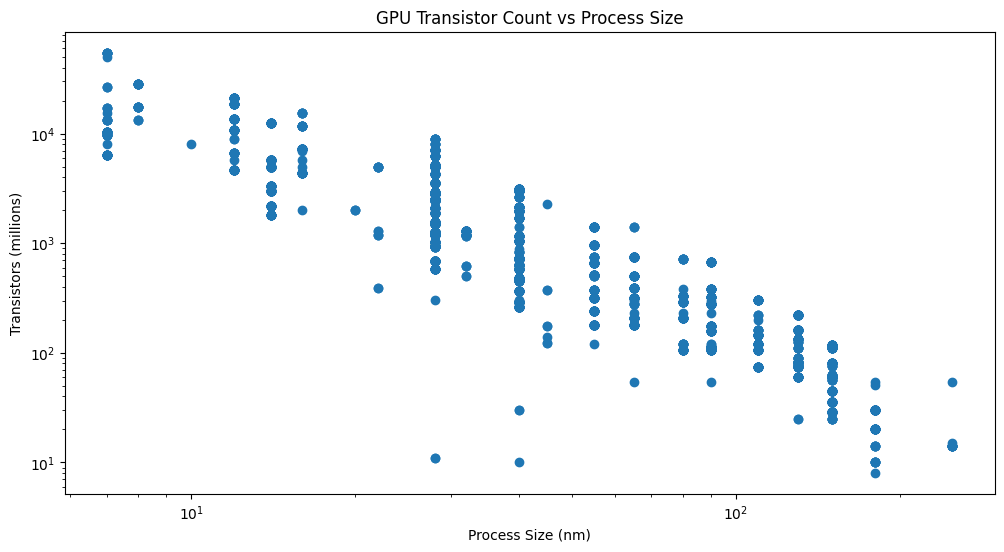

In [98]:
# GPU performance factors
gpu_data = data[data['Type'] == 'GPU']
plt.figure(figsize=(12, 6))
plt.scatter(gpu_data['Process Size (nm)'], gpu_data['Transistors (million)'])
plt.title("GPU Transistor Count vs Process Size")
plt.xlabel("Process Size (nm)")
plt.ylabel("Transistors (millions)")
plt.xscale('log')
plt.yscale('log')
plt.show()

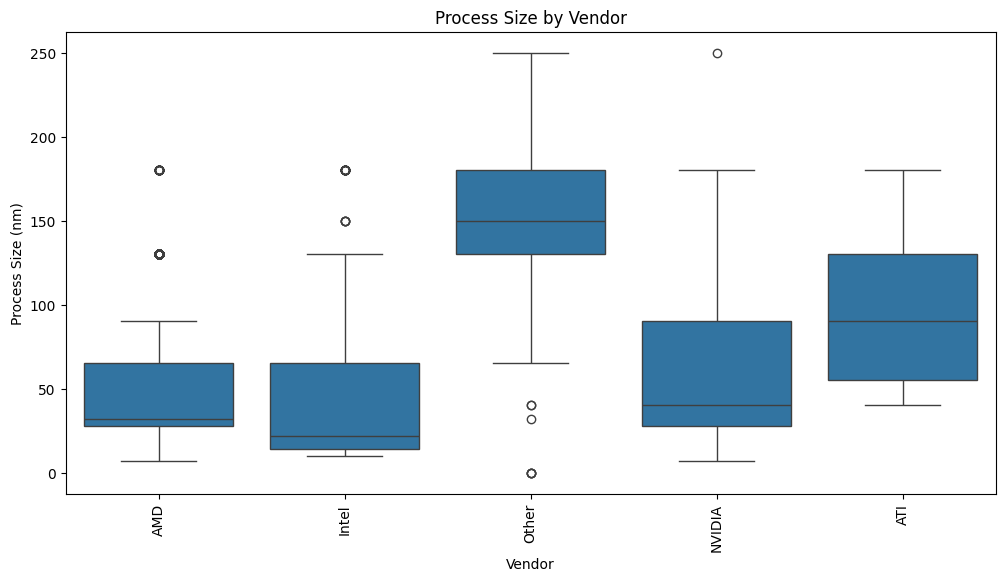

In [99]:
# Process Size by Vendor
plt.figure(figsize=(12, 6))
sns.boxplot(x= 'Vendor', y='Process Size (nm)', data=data)
plt.title("Process Size by Vendor")
plt.xticks(rotation=90)
plt.show()

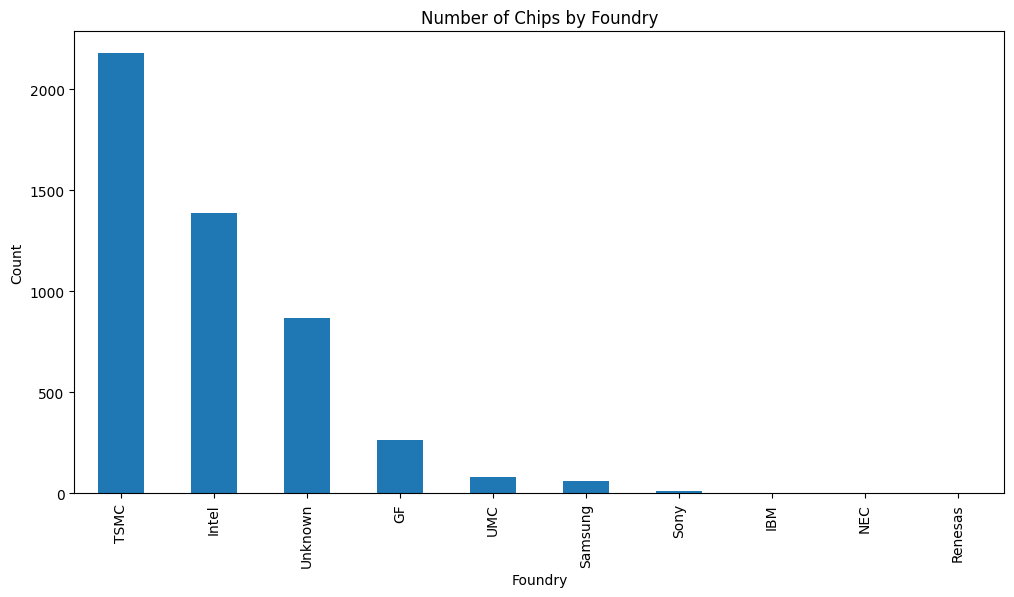

In [100]:
# Chips by Foundry
plt.figure(figsize=(12, 6))
data['Foundry'].value_counts().plot(kind='bar')
plt.title("Number of Chips by Foundry")
plt.xlabel("Foundry")
plt.ylabel("Count")
plt.show()

### Calculate and Visualize Correlation

In [101]:
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [102]:
numeric_columns = ['Process Size (nm)','TDP (W)','Die Size (mm^2)','Transistors (million)', 'Freq (MHz)']
corr = data[numeric_columns].corr()

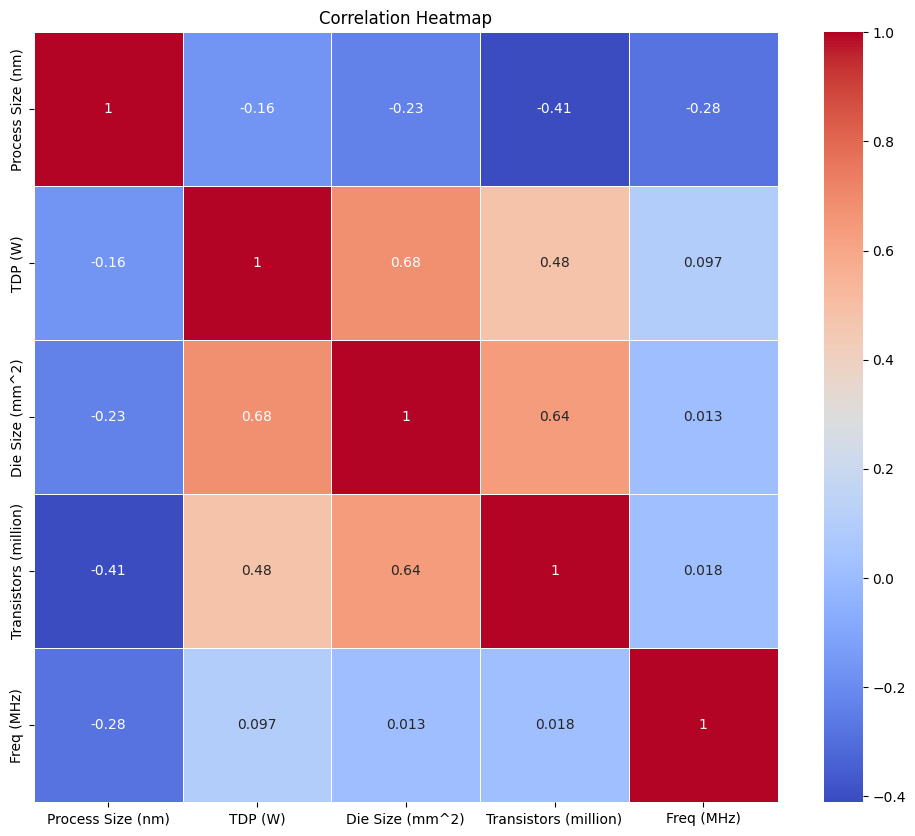

In [103]:
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Encoding 

In [104]:
# Encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['Type', 'Foundry', 'Vendor'])

# Normalize numerical columns
scaler = StandardScaler()
data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])

In [105]:
# Separate our features and target variable
# Assuming we want to predict 'Type' (CPU vs GPU)
X = data.drop('Type', axis=1)
y = data['Type']

# Identify numeric and categorical columns
numeric_features = ['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)']
categorical_features = ['Foundry', 'Vendor']

# Create preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_encoded = pipeline.fit_transform(X)

# Convert to DataFrame for easier viewing
feature_names = (numeric_features + 
                 pipeline.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .get_feature_names_out(categorical_features).tolist())
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names, index=X.index)

# Handle the 'Release Date' column separately
X_encoded_df['Release Date'] = pd.to_datetime(data['Release Date']).astype('int64') // 10**9  # Convert to Unix timestamp

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Encoded features shape:", X_encoded_df.shape)
print("Encoded target shape:", y_encoded.shape)
print("\nFirst few rows of encoded features:")
print(X_encoded_df.head())
print("\nUnique values in encoded target:", np.unique(y_encoded))

Encoded features shape: (4854, 19)
Encoded target shape: (4854,)

First few rows of encoded features:
   Process Size (nm)   TDP (W)  Die Size (mm^2)  Transistors (million)  \
0           0.220620 -0.473445        -0.883227              -0.447018   
1          -0.913797 -0.603656         0.028211               0.709642   
2          -1.002771 -0.694803              NaN                    NaN   
3          -0.735849 -0.017708        -0.225406              -0.131026   
4          -0.224249  0.568239         0.551298              -0.289764   

   Freq (MHz)  Foundry_IBM  Foundry_Intel  Foundry_NEC  Foundry_Renesas  \
0    0.670917          0.0            0.0          0.0              0.0   
1    1.608482          0.0            0.0          0.0              0.0   
2    1.045943          0.0            1.0          0.0              0.0   
3    0.295890          0.0            1.0          0.0              0.0   
4    2.077265          0.0            0.0          0.0              0.0   

  